In [20]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from ta.trend import SMAIndicator, MACD
from ta.momentum import RSIIndicator

In [28]:
# Load the stock data
df_goog = pd.read_csv("../data/GOOG_historical_data.csv")

# Preview the data
df_goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


In [29]:
# Convert 'Date' to datetime format and sort
df_goog["Date"] = pd.to_datetime(df_goog["Date"])
df_goog = df_goog.sort_values("Date")

# Check data structure
df_goog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5020 non-null   datetime64[ns]
 1   Open          5020 non-null   float64       
 2   High          5020 non-null   float64       
 3   Low           5020 non-null   float64       
 4   Close         5020 non-null   float64       
 5   Adj Close     5020 non-null   float64       
 6   Volume        5020 non-null   int64         
 7   Dividends     5020 non-null   float64       
 8   Stock Splits  5020 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 353.1 KB


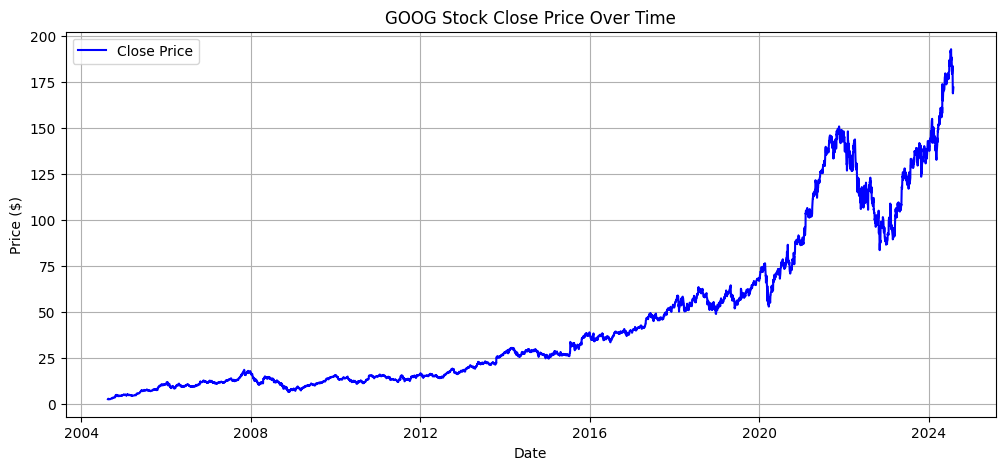

In [30]:
plt.figure(figsize=(12, 5))
plt.plot(df_goog["Date"], df_goog["Close"], label="Close Price", color="blue")
plt.title("GOOG Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.legend()
plt.show()

In [31]:
# Simple Moving Averages
sma20 = SMAIndicator(close=df_goog["Close"], window=20)
sma50 = SMAIndicator(close=df_goog["Close"], window=50)
df_goog["SMA_20"] = sma20.sma_indicator()
df_goog["SMA_50"] = sma50.sma_indicator()

# Relative Strength Index (RSI)
rsi = RSIIndicator(close=df_goog["Close"], window=14)
df_goog["RSI"] = rsi.rsi()

# MACD and Signal Line
macd_indicator = MACD(close=df_goog["Close"])
df_goog["MACD"] = macd_indicator.macd()
df_goog["MACD_Signal"] = macd_indicator.macd_signal()
df_goog["MACD_Diff"] = macd_indicator.macd_diff()  # Histogram (optional)
plt.show()

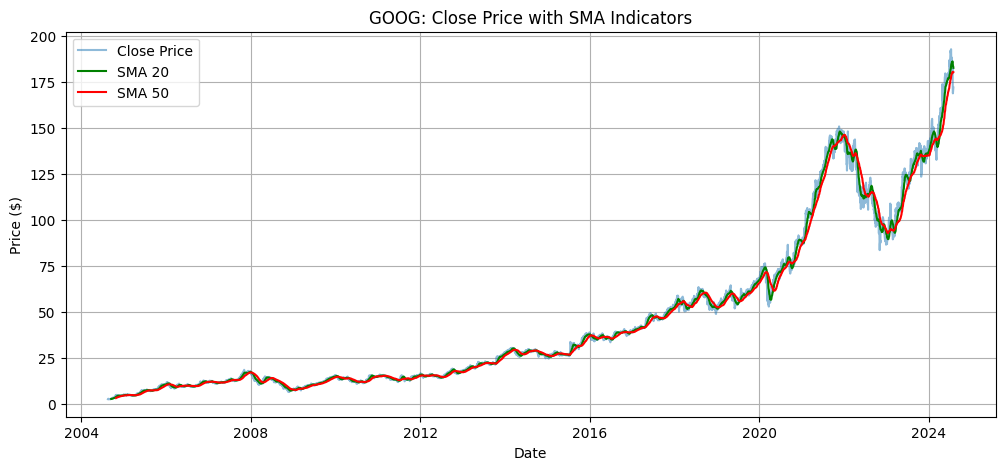

In [32]:
#Moving average
plt.figure(figsize=(12, 5))
plt.plot(df_goog["Date"], df_goog["Close"], label="Close Price", alpha=0.5)
plt.plot(df_goog["Date"], df_goog["SMA_20"], label="SMA 20", color="green")
plt.plot(df_goog["Date"], df_goog["SMA_50"], label="SMA 50", color="red")
plt.title("GOOG: Close Price with SMA Indicators")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

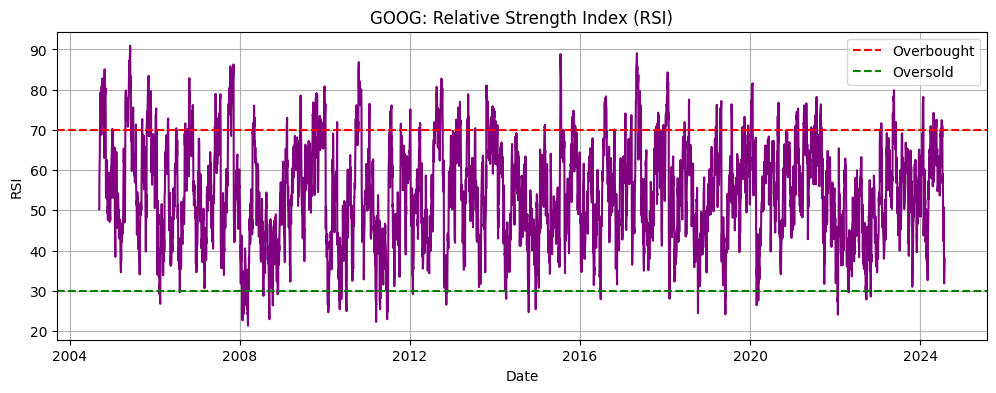

In [33]:
#Relative Strength Index (RSI)
plt.figure(figsize=(12, 4))
plt.plot(df_goog["Date"], df_goog["RSI"], color="purple")
plt.axhline(70, linestyle="--", color="red", label="Overbought")
plt.axhline(30, linestyle="--", color="green", label="Oversold")
plt.title("GOOG: Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.show()

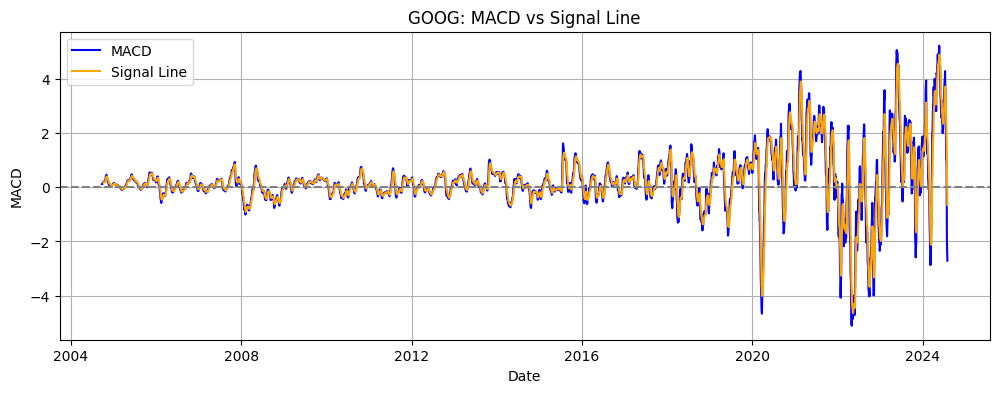

In [34]:
#MACD and Signal Line
plt.figure(figsize=(12, 4))
plt.plot(df_goog["Date"], df_goog["MACD"], label="MACD", color="blue")
plt.plot(df_goog["Date"], df_goog["MACD_Signal"], label="Signal Line", color="orange")
plt.axhline(0, linestyle="--", color="gray")
plt.title("GOOG: MACD vs Signal Line")
plt.xlabel("Date")
plt.ylabel("MACD")
plt.legend()
plt.grid(True)
plt.show()